# Does the commercial aviation industry in US recover completely from COVID?

### 1. Read in data

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [319]:
df = pd.read_csv("./archive/International_Report_Departures.csv")
df


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,04/01/2009,2009,4,10397,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54
2,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
3,02/01/2005,2005,2,11057,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8
4,01/01/2004,2004,1,12478,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988255,03/01/2022,2022,3,99999,ZZZ,1,11534,ELH,204,21743,2LQ,1,Departures,0,1,1
988256,03/01/2022,2022,3,99999,ZZZ,1,11911,GHC,204,21743,2LQ,1,Departures,0,1,1
988257,03/01/2022,2022,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Departures,0,14,14
988258,03/01/2022,2022,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Departures,0,27,27


##### What is the time range?

In [320]:
df['data_dte'] = pd.to_datetime(df['data_dte'])
df['data_dte'].describe()

count                  988260
unique                    387
top       2022-03-01 00:00:00
freq                     3514
first     1990-01-01 00:00:00
last      2022-03-01 00:00:00
Name: data_dte, dtype: object

In [321]:
airport_list = pd.read_csv("airport_code.txt", sep = r'\t')
airport_list['Country'] = airport_list['CityName'].str.extract(pat = r',([^,]+)"')
airport_list['Country'] = airport_list['Country'].str.strip()
airport_list.to_csv("IATA_Airport_Table.csv")

### Use `IATA_Airport_Table.csv` as airport identifier, use `International_Carrier_Codes.txt` as carrier identifier

### 2. Explore the data

##### 2.1 First consider the monthly passenger change

In [322]:
depature_per_month = df.groupby(["Year", "Month"])['Total'].agg(len)
y = depature_per_month.values.reshape(-1)

In [323]:
depature_per_month.values

array([1751, 1774, 1775, 1689, 1619, 1688, 1791, 1750, 1672, 1636, 1646,
       1871, 1697, 1658, 1753, 1688, 1622, 1689, 1716, 1689, 1737, 1741,
       1718, 1941, 1894, 1852, 1892, 1870, 1811, 1803, 1969, 1952, 1813,
       1841, 1867, 2062, 2042, 1988, 2076, 2026, 1851, 1830, 1951, 1954,
       1844, 1844, 1931, 2122, 2152, 2120, 2205, 2209, 1948, 2128, 2122,
       1990, 1947, 1994, 1981, 2249, 2270, 2184, 2332, 2249, 2106, 2204,
       2139, 2092, 2125, 2071, 2074, 2373, 2384, 2330, 2431, 2313, 2149,
       2225, 2226, 2296, 2121, 2071, 2145, 2307, 2351, 2301, 2555, 2321,
       2209, 2371, 2324, 2256, 2216, 2167, 2218, 2445, 2547, 2450, 2601,
       2447, 2340, 2405, 2396, 2374, 2330, 2259, 2241, 2388, 2583, 2387,
       2618, 2546, 2330, 2477, 2396, 2338, 2333, 2289, 2244, 2453, 2527,
       2448, 2579, 2466, 2389, 2352, 2300, 2399, 2303, 2340, 2331, 2537,
       2377, 2410, 2525, 2417, 2260, 2416, 2329, 2380, 2306, 2041, 2011,
       2140, 2162, 2137, 2397, 2265, 2150, 2216, 21

In [324]:
time_index = pd.date_range(start = '1990-01-01', end = '2022-03-01', freq = 'MS')
time_index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', length=387, freq='MS')

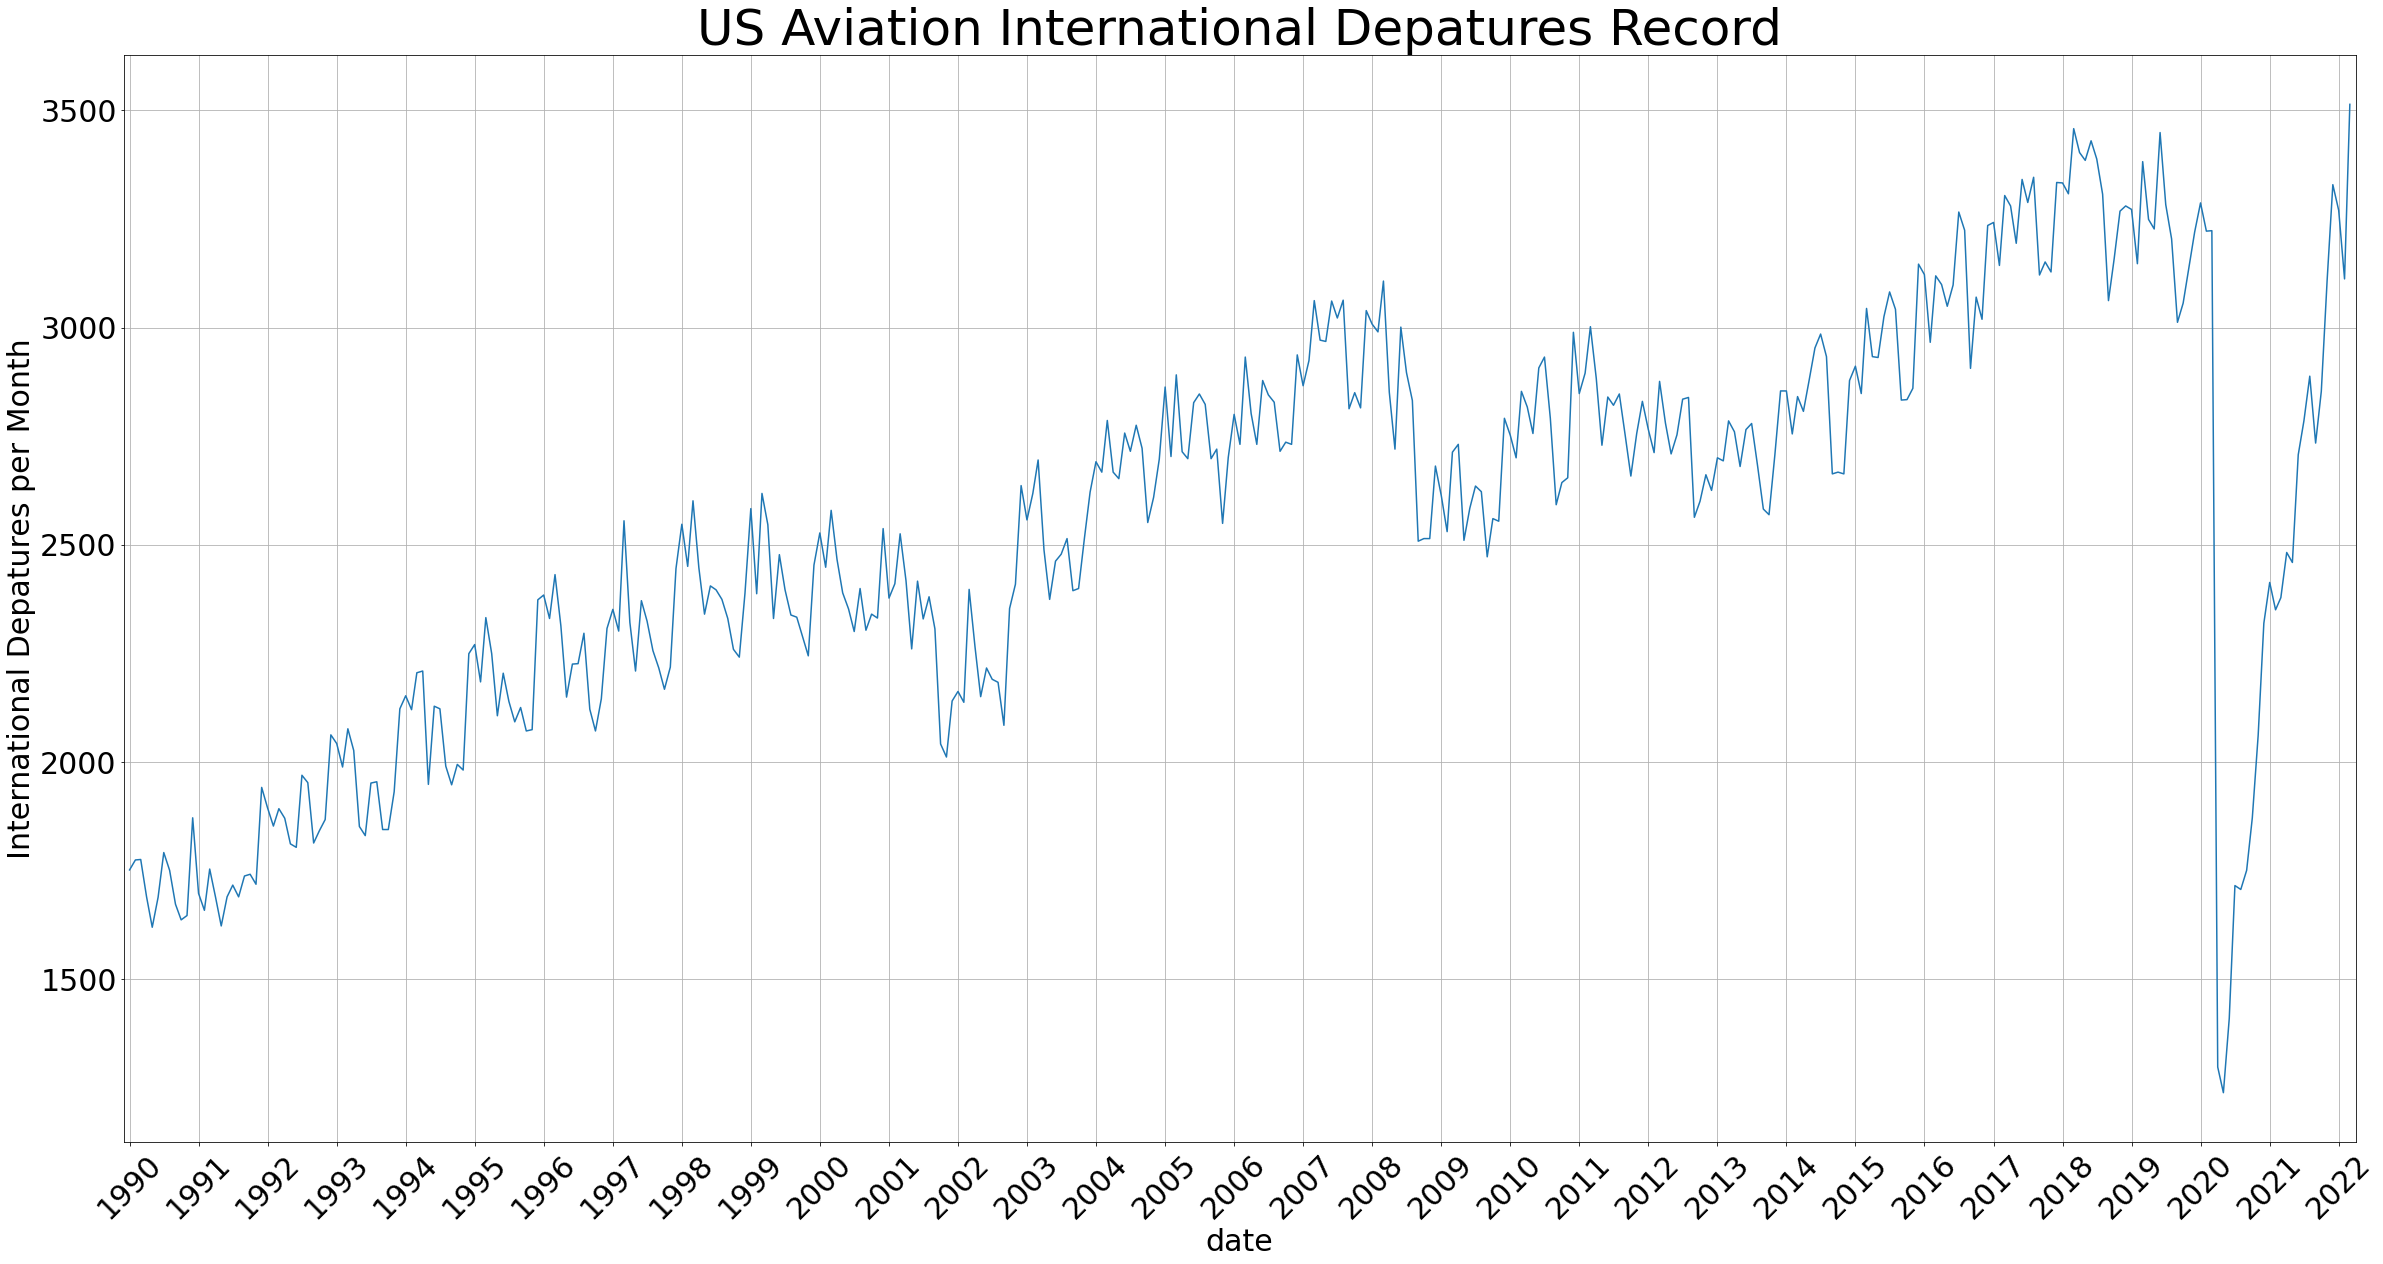

In [325]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((40,20))
sns.lineplot(time_index,y)
plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2022-04-01')))
plt.xticks(size = 30, rotation = 45)
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.yticks([1500,2000,2500,3000,3500],size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('International Depatures per Month', size = 30)
plt.title("US Aviation International Depatures Record", size = 50)
plt.grid()
plt.show()

##### 2.2 Then consider which airports have the most international departure

In [326]:
dp_df = df.groupby('usg_apt')[['data_dte']].agg(len).sort_values(by = "data_dte", ascending = False)
dp_df.columns = ['total depature']
dp_df.head(20)


,total depature
usg_apt,
MIA,140982
JFK,82662
LAX,61561
ORD,46962
EWR,38604
IAH,33942
ATL,30435
ANC,26616
SJU,23993


##### 2.3 Consider the most popular airline carriers

In [327]:
al_df = df.groupby("carrier")[['data_dte']].agg(len).sort_values(by = 'data_dte', ascending = False)
al_df.columns = ['total depature']
al_df.head(50)

,total depature
carrier,
AA,62574
DL,51250
UA,46228
CO,25754
FX,23535
AC,20995
5Y,15833
US,15812
5X,15536


##### 2.4 Consider the most popular destinations

In [328]:
des_df = df.groupby('fg_apt')[['data_dte']].agg(len).sort_values(by = 'data_dte', ascending = False)
des_df.columns = ['total depatures']
des_df.head(20)

,total depatures
fg_apt,
YYZ,52692
CUN,34092
MEX,28496
NRT,22356
YVR,21948
YUL,20248
FRA,18490
LHR,16927
NAS,16010


Try to join this table with the area code so that we can know how many flights fly to different contries

In [329]:
airport_list = pd.read_json('archive/airports.json')
airport_list = airport_list.T
airport_list

,icao,iata,name,city,state,country,elevation,lat,lon,tz
00AK,00AK,,Lowell Field,Anchor Point,Alaska,US,450,59.9492,-151.695999,America/Anchorage
00AL,00AL,,Epps Airpark,Harvest,Alabama,US,820,34.864799,-86.770302,America/Chicago
00AZ,00AZ,,Cordes Airport,Cordes,Arizona,US,3810,34.305599,-112.165001,America/Phoenix
00CA,00CA,,Goldstone /Gts/ Airport,Barstow,California,US,3038,35.350498,-116.888,America/Los_Angeles
00CO,00CO,,Cass Field,Briggsdale,Colorado,US,4830,40.6222,-104.344002,America/Denver
...,...,...,...,...,...,...,...,...,...,...
ZYTN,ZYTN,TNH,Tonghua Sanyuanpu Airport,Tonghua,Jilin,CN,1200,42.253889,125.703333,Asia/Shanghai
ZYTX,ZYTX,SHE,Taoxian Airport,Shenyang,Liaoning,CN,198,41.639801,123.483002,Asia/Shanghai
ZYXC,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30,40.580299,120.697998,Asia/Shanghai
ZYYJ,ZYYJ,YNJ,Yanji Chaoyangchuan Airport,Yanji,Jilin,CN,624,42.882801,129.451004,Asia/Shanghai


In [330]:
airport_list.to_csv('airports.csv')

In [331]:
depature_by_destination = pd.merge(left = des_df, right = airport_list, left_on = 'fg_apt', right_on = 'iata', how = 'left').dropna(axis = 0)
depature_by_destination = depature_by_destination[['total depatures', 'iata', 'city', 'country']]

Now try to combine this to continent

In [332]:
continent_list = pd.read_csv('archive/country-and-continent-codes-list-csv.csv')
continent_list = continent_list[['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code']]
depature_by_continent = pd.merge(left = depature_by_destination, right = continent_list, left_on = 'country', right_on = 'Two_Letter_Country_Code', how = 'left')
depature_by_continent.groupby('Continent_Name')[['total depatures']].agg(sum).sort_values(by = 'total depatures', ascending = False)

,total depatures
Continent_Name,
North America,545160
Europe,213074
Asia,110930
South America,90303
Oceania,21340
Africa,5967


We then may also look at the change of annual departures of each continent. <b style='color:yellow;'>This can be done by Pyspark or PysparkSQL</b>

In [333]:
country_annual_dpt = pd.merge(left = df, right = airport_list, left_on = 'fg_apt', right_on = 'iata', how = 'left').dropna(axis = 0)
continent_annual_dpt = pd.merge(left = country_annual_dpt, right = continent_list, left_on = 'country', right_on = 'Two_Letter_Country_Code', how = 'left')[['Continent_Name', 'Year', 'Month', 'Total']]
continent_annual_dpt

,Continent_Name,Year,Month,Total
0,Oceania,2006,5,10
1,Europe,2009,4,54
2,Asia,2003,5,15
3,North America,2005,2,8
4,South America,2004,1,30
...,...,...,...,...
983729,North America,2022,3,2
983730,North America,2022,3,1
983731,North America,2022,3,1
983732,North America,2022,3,14


In [334]:
africa_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'Africa']
asia_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'Asia']
north_america_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'North America']
south_america_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'South America']
europe_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'Europe']
oceania_annual_dpt = continent_annual_dpt[continent_annual_dpt['Continent_Name'] == 'Oceania']
continent_annual_dpt_list = [africa_annual_dpt, asia_annual_dpt, north_america_annual_dpt, south_america_annual_dpt, europe_annual_dpt, oceania_annual_dpt]

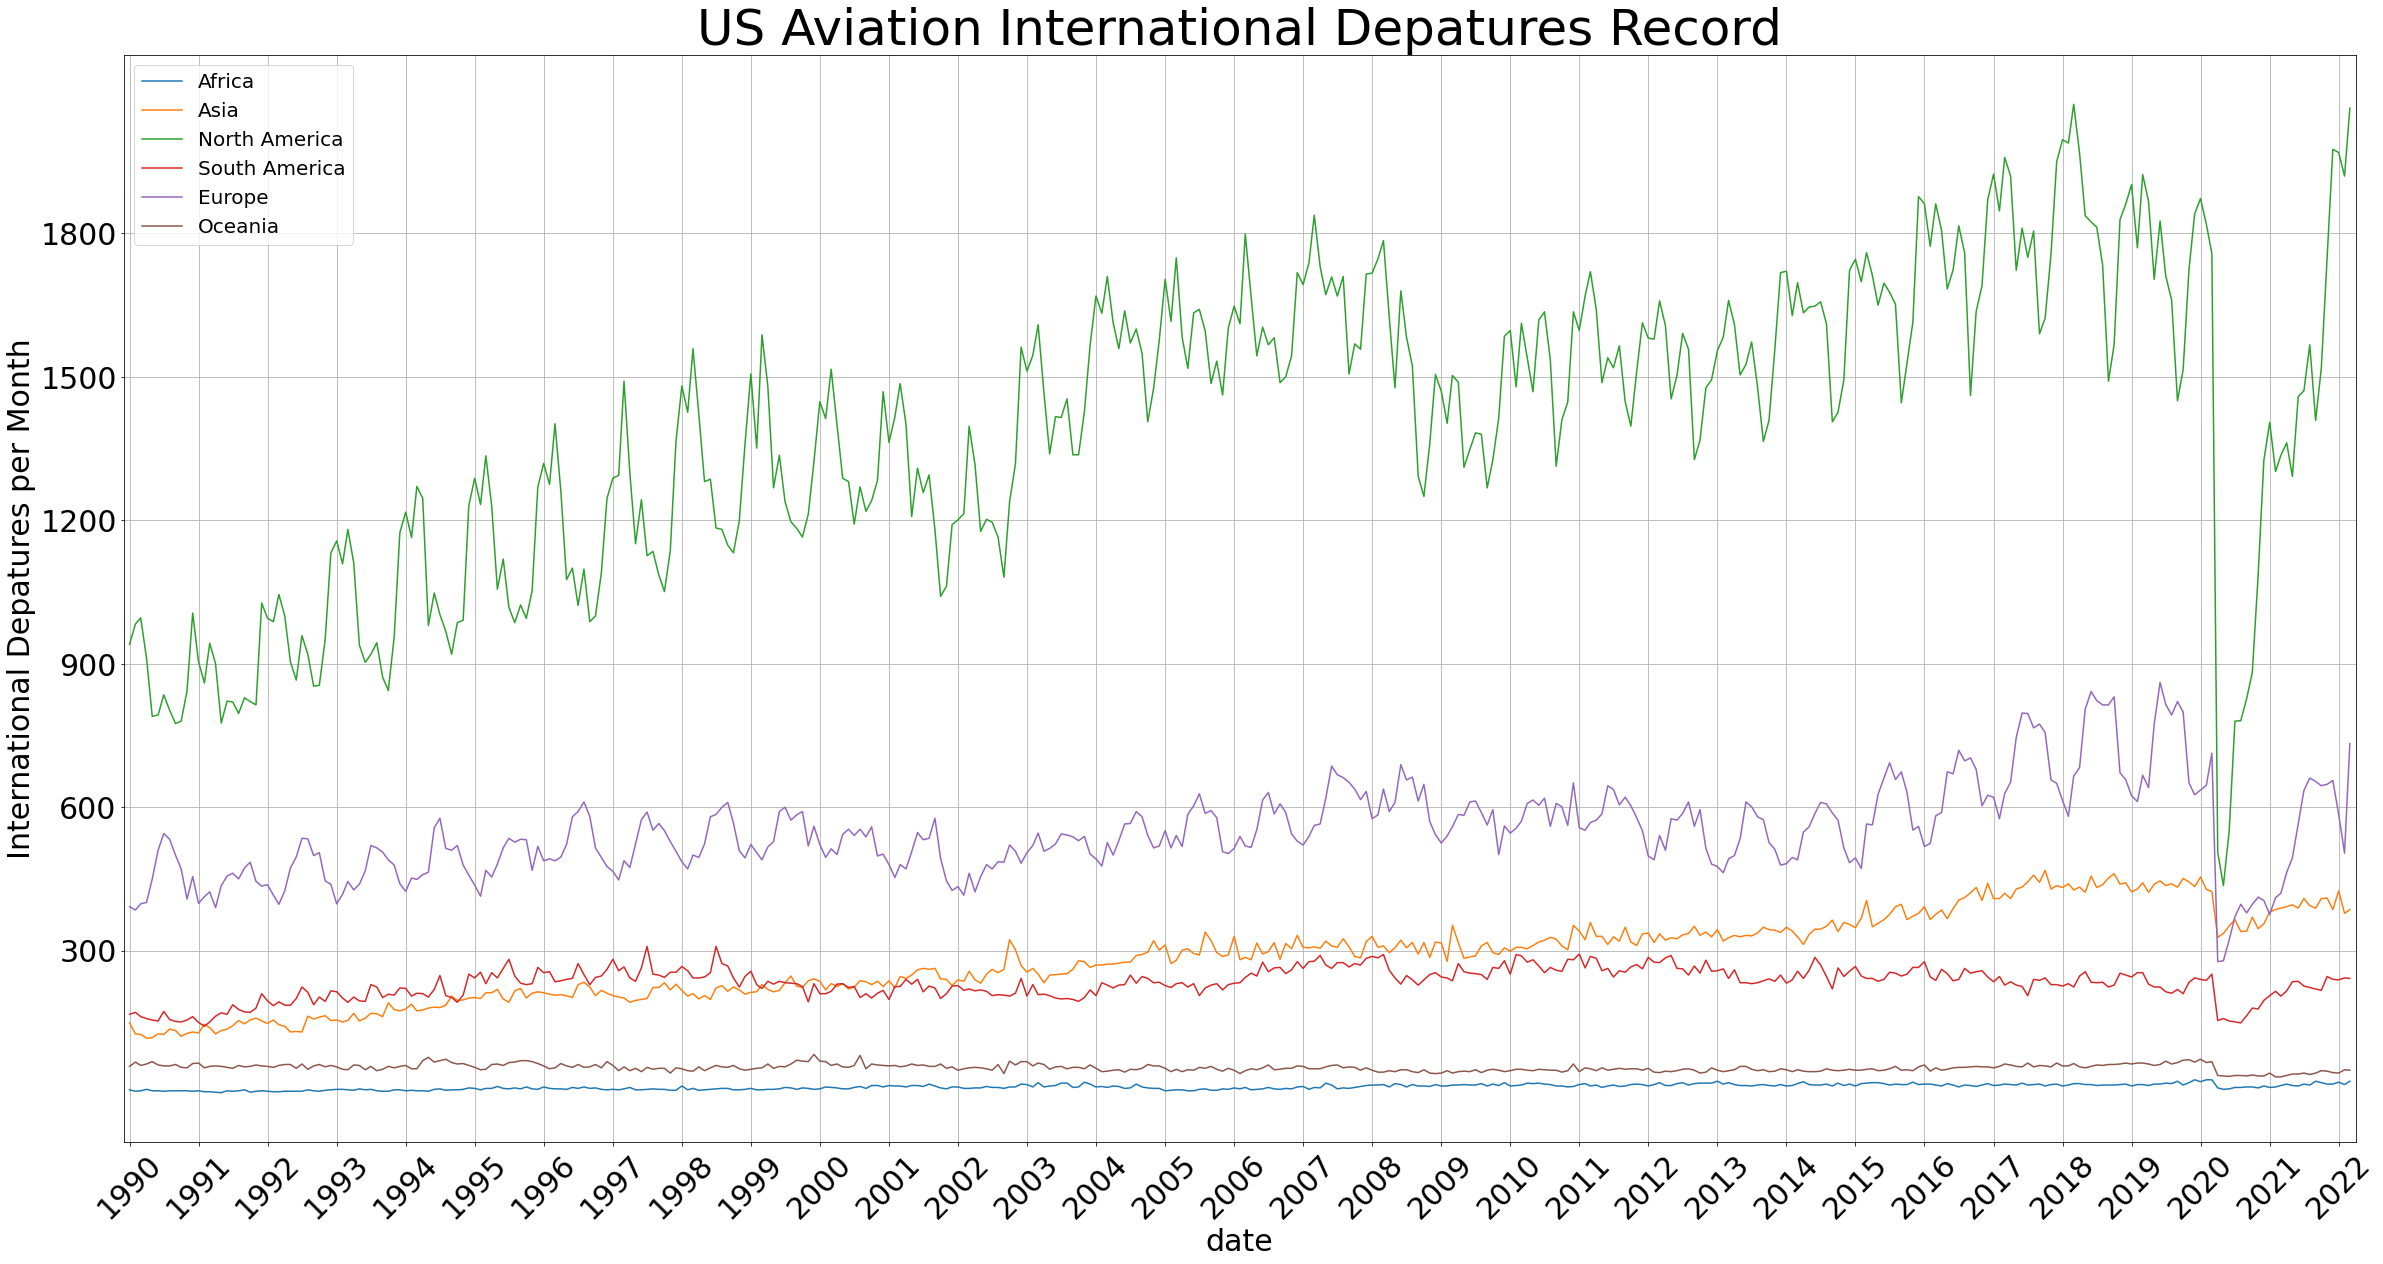

In [335]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((40,20))
for continent_dpt in continent_annual_dpt_list:
    depature_per_month = continent_dpt.groupby(["Year", "Month"])['Total'].agg(len)
    sns.lineplot(time_index,depature_per_month, label = continent_dpt['Continent_Name'].unique()[0])
plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2022-04-01')))
plt.xticks(size = 30, rotation = 45)
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.yticks([300,600,900,1200,1500,1800],size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('International Depatures per Month', size = 30)
plt.title("US Aviation International Depatures Record", size = 50)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

##### 2.5 We now try to find some changes to the US aviation

**2.5.1** Annually hottest destination

For example, we can use Pyspark to find 10 hotest airlines in each year and try to find whether there is a significant change. <b style="color:yellow">This can be done by pysparksql</b>. The code can be found in <a href = 'hot_airline.py'>hot_airline.py</a>. The job is submitted to the `Greatlakes` and the result is stored in <a href = 'hot_destination.csv'>hot_destination.csv</a>. 

Let's load the result in

In [336]:
hottest_destination = pd.read_csv("hot_destination.csv", names = ['Year', 'Country', 'Total Departures'])
hottest_destination

,Year,Country,Total Departures
0,1990,Canada,3365
1,1990,"Mexico, United Mexican States",2722
2,1990,United Kingdom of Great Britain & Northern Ire...,1387
3,1990,Japan,1002
4,1990,"Germany, Federal Republic of",916
...,...,...,...
325,2022,"Germany, Federal Republic of",312
326,2022,Japan,310
327,2022,"Colombia, Republic of",233
328,2022,"Costa Rica, Republic of",228


We will first look at the trend before the COVID, from 1990 to 2015, look at some specific years.

In [337]:
hottest_destination[hottest_destination['Year'] == 1990]

,Year,Country,Total Departures
0,1990,Canada,3365
1,1990,"Mexico, United Mexican States",2722
2,1990,United Kingdom of Great Britain & Northern Ire...,1387
3,1990,Japan,1002
4,1990,"Germany, Federal Republic of",916
5,1990,"Bahamas, Commonwealth of the",764
6,1990,"France, French Republic",721
7,1990,Dominican Republic,510
8,1990,Jamaica,497
9,1990,"Colombia, Republic of",492


In [338]:
hottest_destination[hottest_destination['Year'] == 2000]

,Year,Country,Total Departures
100,2000,"Mexico, United Mexican States",5861
101,2000,Canada,4177
102,2000,United Kingdom of Great Britain & Northern Ire...,1717
103,2000,Japan,1592
104,2000,"Germany, Federal Republic of",851
105,2000,"Bahamas, Commonwealth of the",823
106,2000,Dominican Republic,822
107,2000,"Brazil, Federative Republic of",736
108,2000,"France, French Republic",664
109,2000,Jamaica,614


In [339]:
hottest_destination[hottest_destination['Year'] == 2010]

,Year,Country,Total Departures
200,2010,Canada,6676
201,2010,"Mexico, United Mexican States",4990
202,2010,United Kingdom of Great Britain & Northern Ire...,1562
203,2010,"Germany, Federal Republic of",1479
204,2010,Japan,1302
205,2010,Dominican Republic,1013
206,2010,"Brazil, Federative Republic of",930
207,2010,"Bahamas, Commonwealth of the",863
208,2010,"Colombia, Republic of",723
209,2010,"France, French Republic",655


In [340]:
hottest_destination[hottest_destination['Year'] == 2015]

,Year,Country,Total Departures
250,2015,Canada,7164
251,2015,"Mexico, United Mexican States",5515
252,2015,United Kingdom of Great Britain & Northern Ire...,1642
253,2015,Japan,1320
254,2015,"Germany, Federal Republic of",1167
255,2015,Dominican Republic,1102
256,2015,"China, People's Republic of",807
257,2015,"Brazil, Federative Republic of",801
258,2015,"Bahamas, Commonwealth of the",770
259,2015,"France, French Republic",723


Then let's have a look at the 2019-2022 period

In [341]:
hottest_destination_2019 = hottest_destination[hottest_destination['Year'] == 2019]

In [342]:
hottest_destination_2020 = hottest_destination[hottest_destination['Year'] == 2020]

In [343]:
hottest_destination_2021 = hottest_destination[hottest_destination['Year'] == 2021]

In [344]:
hottest_destination_2022 = hottest_destination[hottest_destination['Year'] == 2022]

We can do a better visualization. Here we define a plot function to create top plots.

In [345]:
import matplotlib.ticker as ticker

def plot_hot(hottest_list, item_name:str, title:str):
    dict_t = {}
    color_list = ['black', 'gray', 'red', 'green', 'blue', 'gold', 'violet', 'maroon', 'orange', 'pink', 'olive', 'aqua', 'lightsteelblue', 'purple', 'light green']
    for index, element in enumerate(hottest_list):
        for i, item in enumerate(element[item_name]):
            if item not in dict_t.keys():
                dict_t[item] = np.zeros(4)
                dict_t[item][index] =  10 - i
            
            else:
                dict_t[item][index] = 10 - i

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((10,5))
    for color_index, item in enumerate(dict_t.keys()):
        ranks = dict_t[item]
        sns.lineplot(pd.date_range(start = '2019-01-01', end = '2022-01-01', freq = 'AS'), ranks, label = item.split(',')[0] if isinstance(item, str) else item, color = color_list[color_index])
        sns.scatterplot(pd.date_range(start = '2019-01-01', end = '2022-01-01', freq = 'AS'), ranks, color = color_list[color_index])
    # plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2022-04-01')))
    plt.xticks(pd.date_range(start = '2019-01-01', end = '2022-01-01', freq = 'AS'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    date_form = mdates.DateFormatter("%Y")
    ax.xaxis.set_major_formatter(date_form)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    plt.yticks()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(title)
    plt.legend(loc = (1.04,0.2))
    plt.grid()
    plt.show()



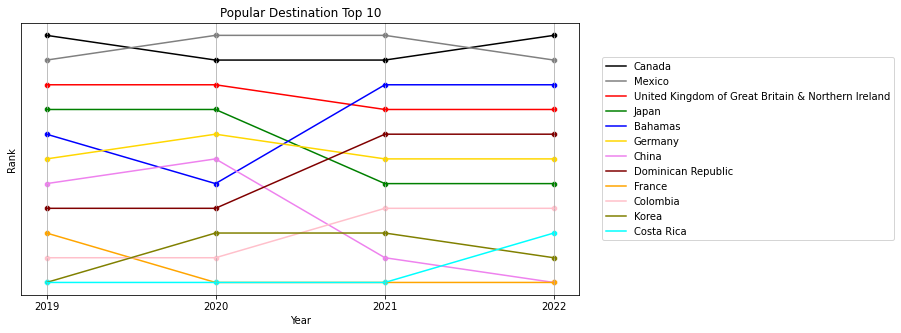

In [346]:
hottest_destinations = [hottest_destination_2019, hottest_destination_2020, hottest_destination_2021, hottest_destination_2022]
plot_hot(hottest_destinations, 'Country', 'Popular Destination Top 10')

**Conclusion:**
1. China made it into top 10 after 2010
2. The general ranking is almost fixed and is not influenced by the COVID. Although the amount is changing.
3. Extremely, overwhelmingly more flights to Canada and Mexico.
4. The flights to major eastern Asia countries like Japan, China, and Korea drops significantly after 2020, in 2021 and 2022. And China left the top 10 in 2022's first quarter which may be due to Fuse Mechanism which is basically trying to stop flights in order to bring COVID to homeland.

We can also apply the same method to see the annual departures from airports in the U.S. and try to find potential changes using <b style='color:yellow'>PySpark</b>. The code is in <a href='hot_airport.py'>hot_airport.py</a> and the job is uploaded and run by `Greatlakes`. The result is in <a href='hot_airport.csv'>hot_airport_csv</a>.

Now let's load the result and do some analysis

In [347]:
hot_airport = pd.read_csv('hot_airport.csv', names = ['Airport Code', 'City', 'Year', 'Total Departures'])
hot_airport

,Airport Code,City,Year,Total Departures
0,MIA,Miami,1990,3554
1,JFK,New York,1990,2906
2,LAX,Los Angeles,1990,1341
3,ORD,Chicago,1990,860
4,BOS,Boston,1990,700
...,...,...,...,...
325,FLL,Fort Lauderdale,2022,339
326,IAH,Houston,2022,292
327,ANC,Anchorage,2022,288
328,DFW,Dallas-Fort Worth,2022,279


We will first look at the trend before the COVID, from 1990 to 2015, look at some specific years.

In [348]:
hot_airport[hot_airport['Year'] == 1990]

,Airport Code,City,Year,Total Departures
0,MIA,Miami,1990,3554
1,JFK,New York,1990,2906
2,LAX,Los Angeles,1990,1341
3,ORD,Chicago,1990,860
4,BOS,Boston,1990,700
5,HNL,Honolulu,1990,699
6,SJU,San Juan,1990,659
7,ANC,Anchorage,1990,607
8,MCO,Orlando,1990,590
9,SFO,San Francisco,1990,551


In [349]:
hot_airport[hot_airport['Year'] == 2000]

,Airport Code,City,Year,Total Departures
100,MIA,Miami,2000,4062
101,JFK,New York,2000,2559
102,LAX,Los Angeles,2000,1934
103,ORD,Chicago,2000,1460
104,EWR,Newark,2000,1186
105,ATL,Atlanta,2000,895
106,SJU,San Juan,2000,894
107,IAH,Houston,2000,887
108,ANC,Anchorage,2000,838
109,SFO,San Francisco,2000,757


In [350]:
hot_airport[hot_airport['Year'] == 2010]

,Airport Code,City,Year,Total Departures
200,MIA,Miami,2010,4471
201,JFK,New York,2010,2569
202,LAX,Los Angeles,2010,1732
203,EWR,Newark,2010,1521
204,ORD,Chicago,2010,1517
205,IAH,Houston,2010,1311
206,ATL,Atlanta,2010,1304
207,ANC,Anchorage,2010,838
208,IAD,Dulles,2010,837
209,FLL,Fort Lauderdale,2010,743


In [351]:
hot_airport[hot_airport['Year'] == 2015]

,Airport Code,City,Year,Total Departures
250,MIA,Miami,2015,4508
251,JFK,New York,2015,2705
252,LAX,Los Angeles,2015,2065
253,ORD,Chicago,2015,1724
254,IAH,Houston,2015,1483
255,EWR,Newark,2015,1461
256,ATL,Atlanta,2015,1211
257,DFW,Dallas-Fort Worth,2015,1007
258,FLL,Fort Lauderdale,2015,975
259,IAD,Dulles,2015,905


Then let's have a look at the 2019-2022 period

In [352]:
hot_airport_2019 = hot_airport[hot_airport['Year'] == 2019]

In [353]:
hot_airport_2020 = hot_airport[hot_airport['Year'] == 2020]

In [354]:
hot_airport_2021 = hot_airport[hot_airport['Year'] == 2021]

In [355]:
hot_airport_2022 = hot_airport[hot_airport['Year'] == 2022]

We can create a better visualization to this

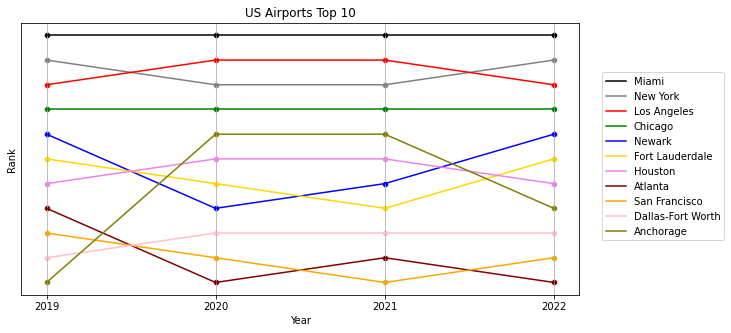

In [356]:
hot_airports = [hot_airport_2019, hot_airport_2020, hot_airport_2021, hot_airport_2022]
plot_hot(hot_airports, 'City', 'US Airports Top 10')

**Conclusion:**
1. One of the significant growth is Newark from 1990-2000.
2. The top 5 are stable.
3. One thing we could discover is that, in 2020, Miami is far more stable than the other airports. We also notice that Anchorage used to be kicked out of the top10 list, but it made to rank 5 in 2020. One important reason is that these two airports are the core inter-connection station for international cargo transportation. Almost all the Asia-North America cargo flights go through Anchorage, while almost all the North America-South America cargo flights go through Miami. During the covid pandemic, these two airports play an important role in transporting the essential goods and materials.

We are also curious about the carriers. Does the pandemic influence the number of international carriers coming to the US?

read in the carrier csv

In [357]:
carriers = pd.read_csv('airline_codes.csv', sep = ',')
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1566,ZW,Air Wisconsin Airlines Corp
1567,ZX,Air Georgian
1568,ZX (1),Airbc Ltd.
1569,ZY,Atlantic Gulf Airlines


First consider annual top carriers, this can be done by <b style="color:yellow">PySpark</a>

For example, we can use Pyspark to find 10 hotest air carriers in each year and try to find whether there is a significant change. <b style="color:yellow">This can be done by pysparksql</b>. The code can be found in <a href = 'hot_carrier.py'>hot_carrier.py</a>. The job is submitted to the `Greatlakes` and the result is stored in <a href = 'hot_carrier.csv'>hot_carrier.csv</a>. 

In [358]:
hot_carrier = pd.read_csv('hot_carrier.csv', names = ['Year', 'Airline', 'Airline Code', 'Total Departures'])
hot_carrier

,Year,Airline,Airline Code,Total Departures
0,1990,American Airlines Inc.,AA,1112
1,1990,Continental Air Lines Inc.,CO,1010
2,1990,Florida Coastal Airlines,PA,991
3,1990,ATA Airlines d/b/a ATA,TZ,941
4,1990,Northwest Airlines Inc.,NW,583
...,...,...,...,...
325,2022,Chartright Air Inc.,13Q,275
326,2022,VistaJet Limited,VJT,272
327,2022,Federal Express Corporation,FX,247
328,2022,"Swift Air, LLC",09Q,221


In [359]:
hot_carrier_2019 = hot_carrier[hot_carrier['Year'] == 2019]
hot_carrier_2019.replace(pd.NA, 'Western Air Charter', inplace = True)

In [360]:
hot_carrier_2020 = hot_carrier[hot_carrier['Year'] == 2020]
hot_carrier_2020.replace(pd.NA, 'Western Air Charter', inplace = True)

In [361]:
hot_carrier_2021 = hot_carrier[hot_carrier['Year'] == 2021]
hot_carrier_2021.replace(pd.NA, 'Western Air Charter', inplace = True)

In [362]:
hot_carrier_2022 = hot_carrier[hot_carrier['Year'] == 2022]
hot_carrier_2022.replace(pd.NA, 'Western Air Charter', inplace = True)

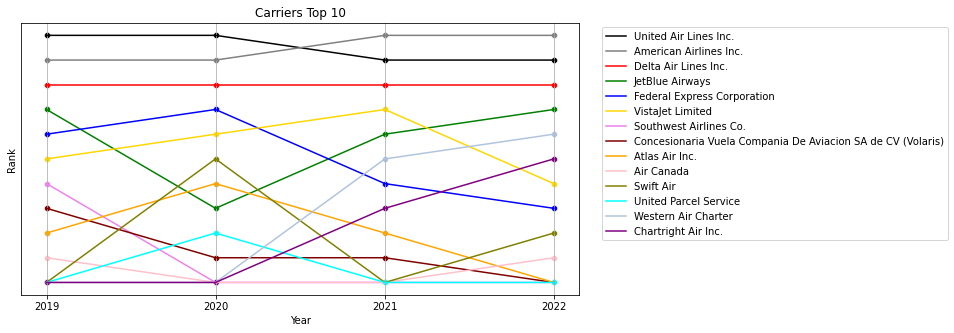

In [363]:
hot_carriers = [hot_carrier_2019, hot_carrier_2020, hot_carrier_2021, hot_carrier_2022]
plot_hot(hot_carriers, 'Airline', 'Carriers Top 10')

**Conclusions:**
1. We noticed that in 2019 and years before, the top airline carriers are all big companies offering public transportations. Including three largest airlines: UA, AA, DL offering passenger flights and FED, UPS, ALTAS offering international cargo transportations. However, since 2020, more private airline carriers began to took place, like VistaJet, Western Air Charter, and Chartright Air. This may due to the fact that wealthy people want to use private planes to travel in order to preventing themselves from catching COVID during the flight.

Consider the percentage of flights conducted by international carriers. We just repeat the task above and filter out the US airlines. However, there are still lots of US airlines remained in results. We then filter the results by hands. The code can be found in <a href='hot_carrier.py'>hot_carrier.py</a> and the result can be found in <a href='International_hot_carrier.py'>International_hot_carrier.py</a>.

In [364]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States")
result = pd.DataFrame()
for table in tables[0:5]:
    result = pd.concat((result, table))

result.to_csv("US_airline_codes.csv")

In [365]:
International_hot_carrier = pd.read_csv('International_hot_carrier.csv', names = ['Year', 'Airline', 'Airline Code', 'Total Departures'])
International_hot_carrier

,Year,Airline,Airline Code,Total Departures
0,1990,Continental Air Lines Inc.,CO,1010
1,1990,Florida Coastal Airlines,PA,991
2,1990,ATA Airlines d/b/a ATA,TZ,941
3,1990,Northwest Airlines Inc.,NW,583
4,1990,Trans World Airways LLC,TW,533
...,...,...,...,...
490,2022,Turk Hava Yollari A.O.,TK,88
491,2022,Lufthansa German Airlines,LH,83
492,2022,British Airways Plc,BA,71
493,2022,"Aeroenlaces Nacionales, S.A. de C.V. d/b/a Viv...",VB,71


In [366]:
International_hot_carrier_2019 = International_hot_carrier[International_hot_carrier['Year'] == 2019]
International_hot_carrier_2019.drop(index = [435, 439, 444, 447, 448, 449], inplace = True)

In [367]:
International_hot_carrier_2020 = International_hot_carrier[International_hot_carrier['Year'] == 2020]
International_hot_carrier_2020.drop(index = [450, 451, 453, 454, 463, 464], inplace= True)

In [368]:
International_hot_carrier_2021 = International_hot_carrier[International_hot_carrier['Year'] == 2021]
International_hot_carrier_2021.drop(index = [465, 466, 468, 469, 476, 478], inplace = True)

In [369]:
International_hot_carrier_2022 = International_hot_carrier[International_hot_carrier['Year'] == 2022]
International_hot_carrier_2022.drop(index = [480, 481, 482, 486, 488, 494], inplace = True)

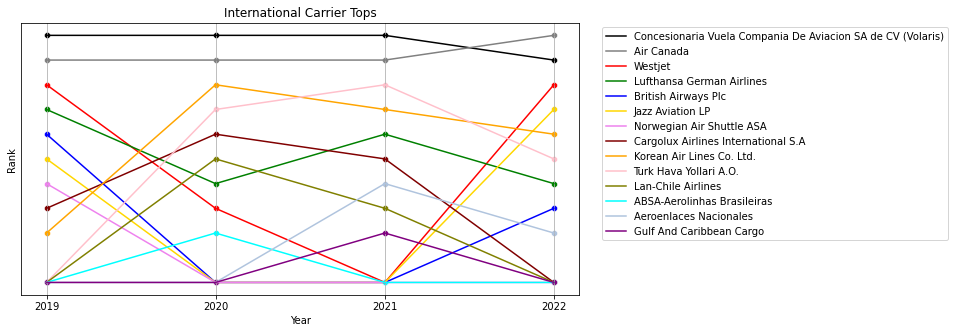

In [370]:
International_hot_carriers = [International_hot_carrier_2019, International_hot_carrier_2020, International_hot_carrier_2021, International_hot_carrier_2022]
plot_hot(International_hot_carriers, 'Airline', 'International Carrier Tops')

**Conclusions:**
1. The COVID has exerted a significant influence on the international airline carriers. Lots of the top international carriers like WestJet, British Airways, and Norwegian Air have large reduce in the amount of flights. However, there are also some international carriers improve their ranks since 2020 like Turkish Airline and Korean Airlines. As far as I know, they develop cargo transportation during these year including using passenger planes to carry cargos and buying new cargo planes.


### 3. Consider Cargo

In [371]:
cargo_df = pd.read_csv("./archive/International_Report_Freight.csv")
cargo_df


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2008,2008,5,13930,ORD,41,16217,YUL,941,19531,AC,0,Freight,3,0,3
1,06/01/2005,2005,6,13303,MIA,33,14739,SDQ,224,20400,PT,1,Freight,0,21,21
2,09/01/2006,2006,9,13204,MCO,33,12972,LHR,493,19540,BA,0,Freight,15,0,15
3,08/01/2004,2004,8,13487,MSP,63,10292,AMS,461,19386,NW,1,Freight,479,0,479
4,03/01/2004,2004,3,12478,JFK,22,16321,ZRH,486,19805,AA,1,Freight,687,0,687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596354,03/01/2022,2022,3,16091,YIP,43,12164,HMO,148,20447,U7,1,Freight,0,1,1
596355,03/01/2022,2022,3,16091,YIP,43,13514,MTY,148,20447,U7,1,Freight,0,1,1
596356,03/01/2022,2022,3,16091,YIP,43,14886,SLW,148,20447,U7,1,Freight,0,2,2
596357,03/01/2022,2022,3,16091,YIP,43,16078,YHM,936,20447,U7,1,Freight,0,1,1


In [372]:
cargo_per_month = cargo_df.groupby(["Year", "Month"])['Total'].agg(len)

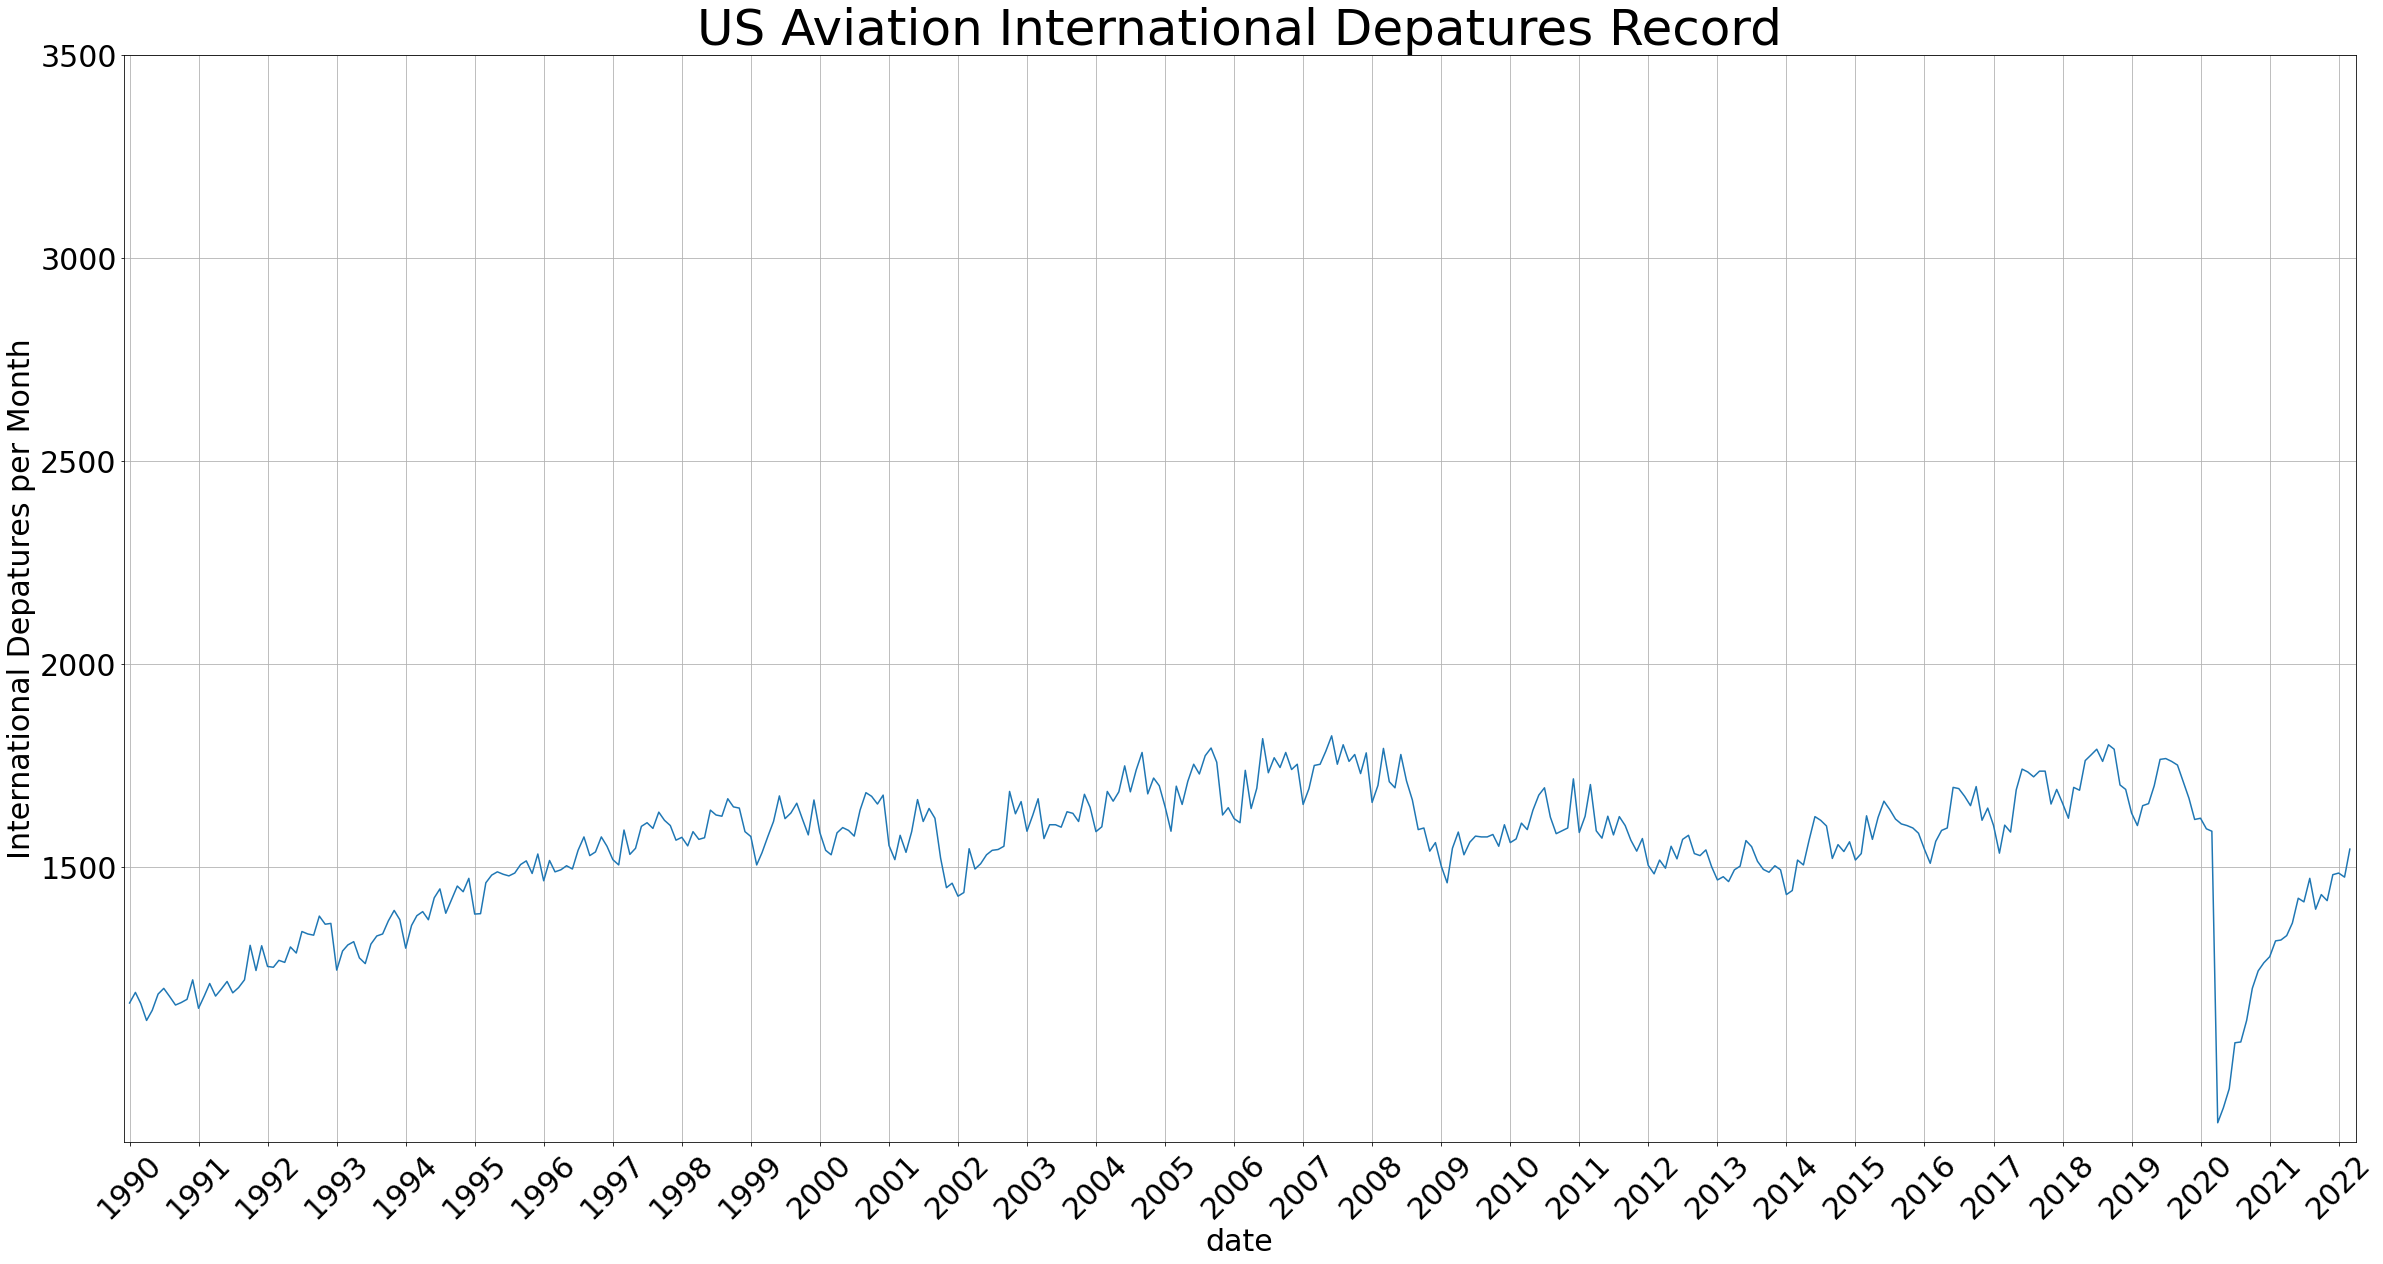

In [373]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((40,20))
sns.lineplot(time_index,cargo_per_month)
plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2022-04-01')))
plt.xticks(size = 30, rotation = 45)
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.yticks([1500,2000,2500,3000,3500],size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('International Depatures per Month', size = 30)
plt.title("US Aviation International Depatures Record", size = 50)
plt.grid()
plt.show()

### 4. Incident Record

In [374]:
incidents = pd.read_csv('Aircraft_Incident_Dataset.csv')
incidents['Incident_Date'] = pd.to_datetime(incidents['Incident_Date'], errors = 'coerce').dropna()
incidents['Incident_year'] = incidents['Incident_Date'].apply(lambda x: x.year)
incidents = incidents[incidents['Incident_year'] >= 1990]

In [375]:
incidents['Year'] = incidents['Incident_Date'].map(lambda x: x.year)
incidents['Month'] = incidents['Incident_Date'].map(lambda x: x.month)

In [376]:
incident_per_month = list(incidents.groupby(["Year", "Month"])['Incident_Date'].agg(len).values)
incident_per_month.append(0)

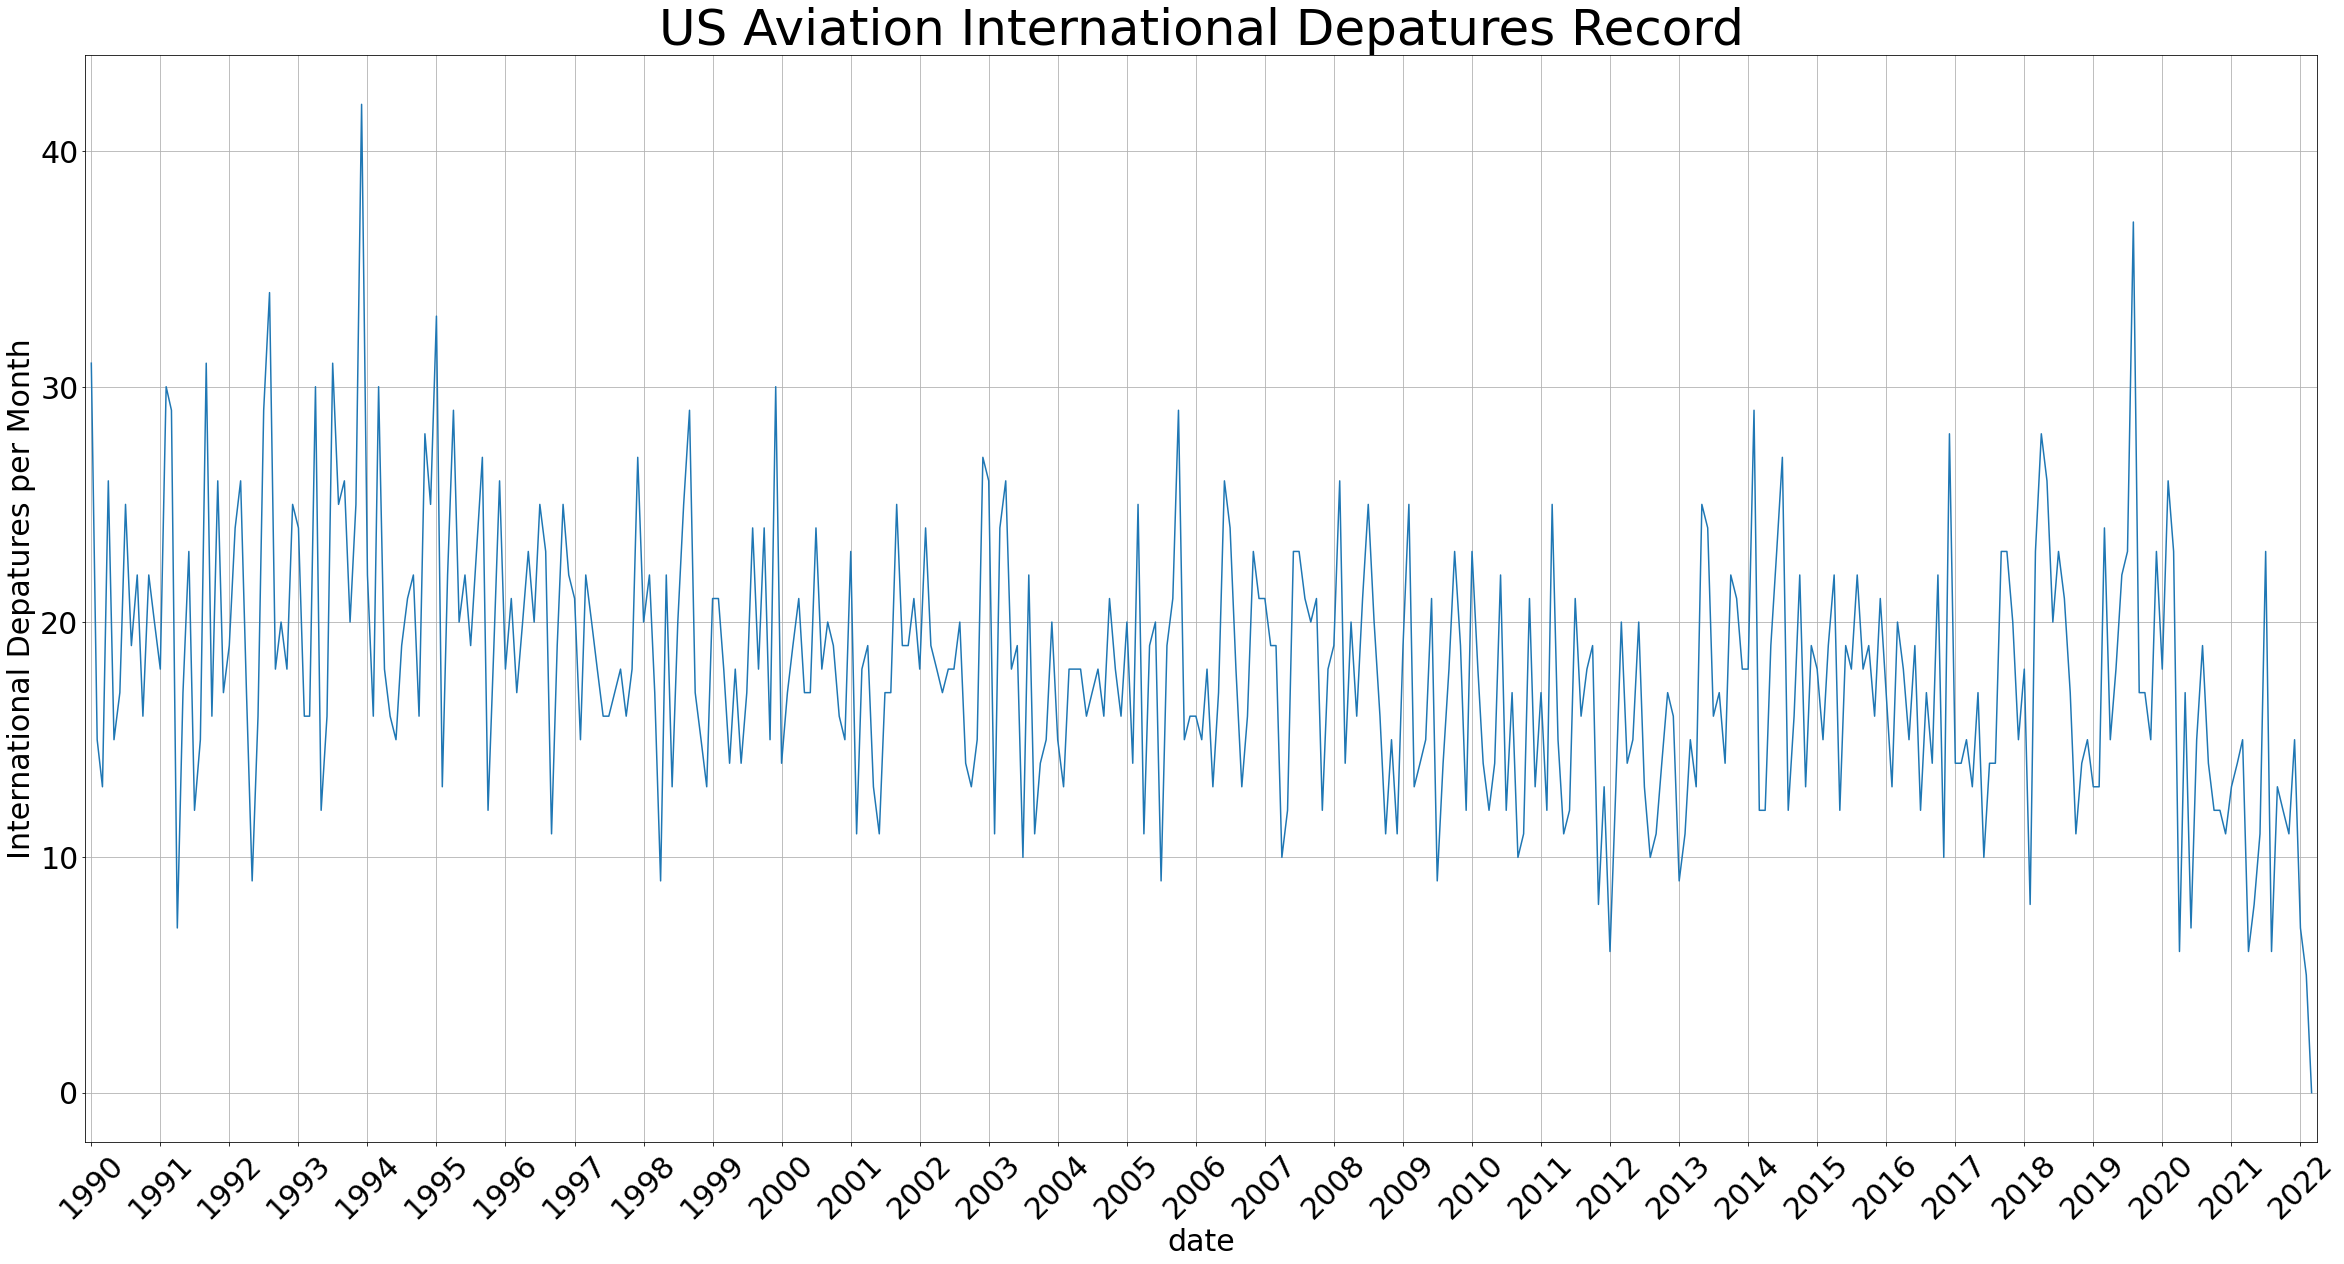

In [377]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((40,20))
sns.lineplot(time_index, incident_per_month)
plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2022-04-01')))
plt.xticks(size = 30, rotation = 45)
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.yticks(size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('International Depatures per Month', size = 30)
plt.title("US Aviation International Depatures Record", size = 50)
plt.grid()
plt.show()

In [390]:
np.corrcoef(y[-5:-1], incident_per_month[-5:-1])

array([[1.        , 0.53642228],
       [0.53642228, 1.        ]])

**Conclusion:**
The correlation coefficient is positive, this means that the COVID does not result in a worse maintainence condition.

In [388]:
incident_per_month

[31,
 15,
 13,
 26,
 15,
 17,
 25,
 19,
 22,
 16,
 22,
 20,
 18,
 30,
 29,
 7,
 17,
 23,
 12,
 15,
 31,
 16,
 26,
 17,
 19,
 24,
 26,
 17,
 9,
 16,
 29,
 34,
 18,
 20,
 18,
 25,
 24,
 16,
 16,
 30,
 12,
 16,
 31,
 25,
 26,
 20,
 25,
 42,
 22,
 16,
 30,
 18,
 16,
 15,
 19,
 21,
 22,
 16,
 28,
 25,
 33,
 13,
 22,
 29,
 20,
 22,
 19,
 23,
 27,
 12,
 19,
 26,
 18,
 21,
 17,
 20,
 23,
 20,
 25,
 23,
 11,
 19,
 25,
 22,
 21,
 15,
 22,
 20,
 18,
 16,
 16,
 17,
 18,
 16,
 18,
 27,
 20,
 22,
 17,
 9,
 22,
 13,
 20,
 25,
 29,
 17,
 15,
 13,
 21,
 21,
 18,
 14,
 18,
 14,
 17,
 24,
 18,
 24,
 15,
 30,
 14,
 17,
 19,
 21,
 17,
 17,
 24,
 18,
 20,
 19,
 16,
 15,
 23,
 11,
 18,
 19,
 13,
 11,
 17,
 17,
 25,
 19,
 19,
 21,
 18,
 24,
 19,
 18,
 17,
 18,
 18,
 20,
 14,
 13,
 15,
 27,
 26,
 11,
 24,
 26,
 18,
 19,
 10,
 22,
 11,
 14,
 15,
 20,
 15,
 13,
 18,
 18,
 18,
 16,
 17,
 18,
 16,
 21,
 18,
 16,
 20,
 14,
 25,
 11,
 19,
 20,
 9,
 19,
 21,
 29,
 15,
 16,
 16,
 15,
 18,
 13,
 17,
 26,
 24,
 18,
 13,

### 5. ARIMA predicting the future trend

388
i =  0 [0.]
389
i =  1 [2061.]
390
i =  2 [2413.00003987]
391
i =  3 [2378.00004007]
392
i =  4 [2408.02182042]
393
i =  5 [2493.13703142]
394
i =  6 [2746.44516082]
395
i =  7 [2696.29680987]
396
i =  8 [3269.99988781]
397
i =  9 [3514.0002436]
398
i =  10 [1383.75430695]
399
i =  11 [2610.11288553]


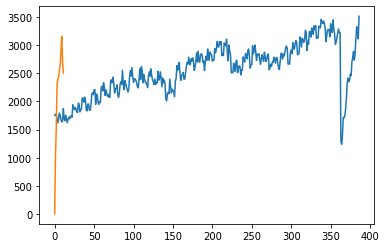

In [380]:
import itertools
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsplt
from statsmodels.tsa.arima.model import ARIMA

predicted_number = 12

data = y
length_data = len(data)

buffer = []
for i in range(predicted_number):
    train_data = data[length_data - 18 + i: length_data + i] # use the departure number of 12 months before target month to train a model
    model = ARIMA(train_data, order = (4,1,4))

    # learning
    result = model.fit()

    # predict the next value
    pred = result.predict(i, i, dynamic = True)
    data:np.ndarray
    data = np.append(data, pred)
    print(len(data))

    pred = np.array(pred)
    buffer.append(pred)
    print ("i = ",i,pred)

def avg(list_t):
    list_t:list
    sum = 0
    for element in list_t:
        sum += element
    return sum/len(list_t)
    
def MA(buffer):
    result = []
    for index, element in enumerate(buffer):
        if index < 3:
            result.append(avg(buffer[0:index + 1])) # if there are fewer than three elements in buffer, just calulate the average
        else:
            result.append(avg(buffer[index - 2:index+1]))
    return result

buffer = MA(buffer)  

In [381]:
lis = np.array([y[-1]])
for element in buffer[1:]:
    lis = np.append(lis, element)
lis

array([3514.        , 1030.5       , 1491.33334662, 2284.00002665,
       2399.67396679, 2426.3862973 , 2549.20133755, 2645.2930007 ,
       2904.24728617, 3160.09898043, 2722.58481279, 2502.62247869])

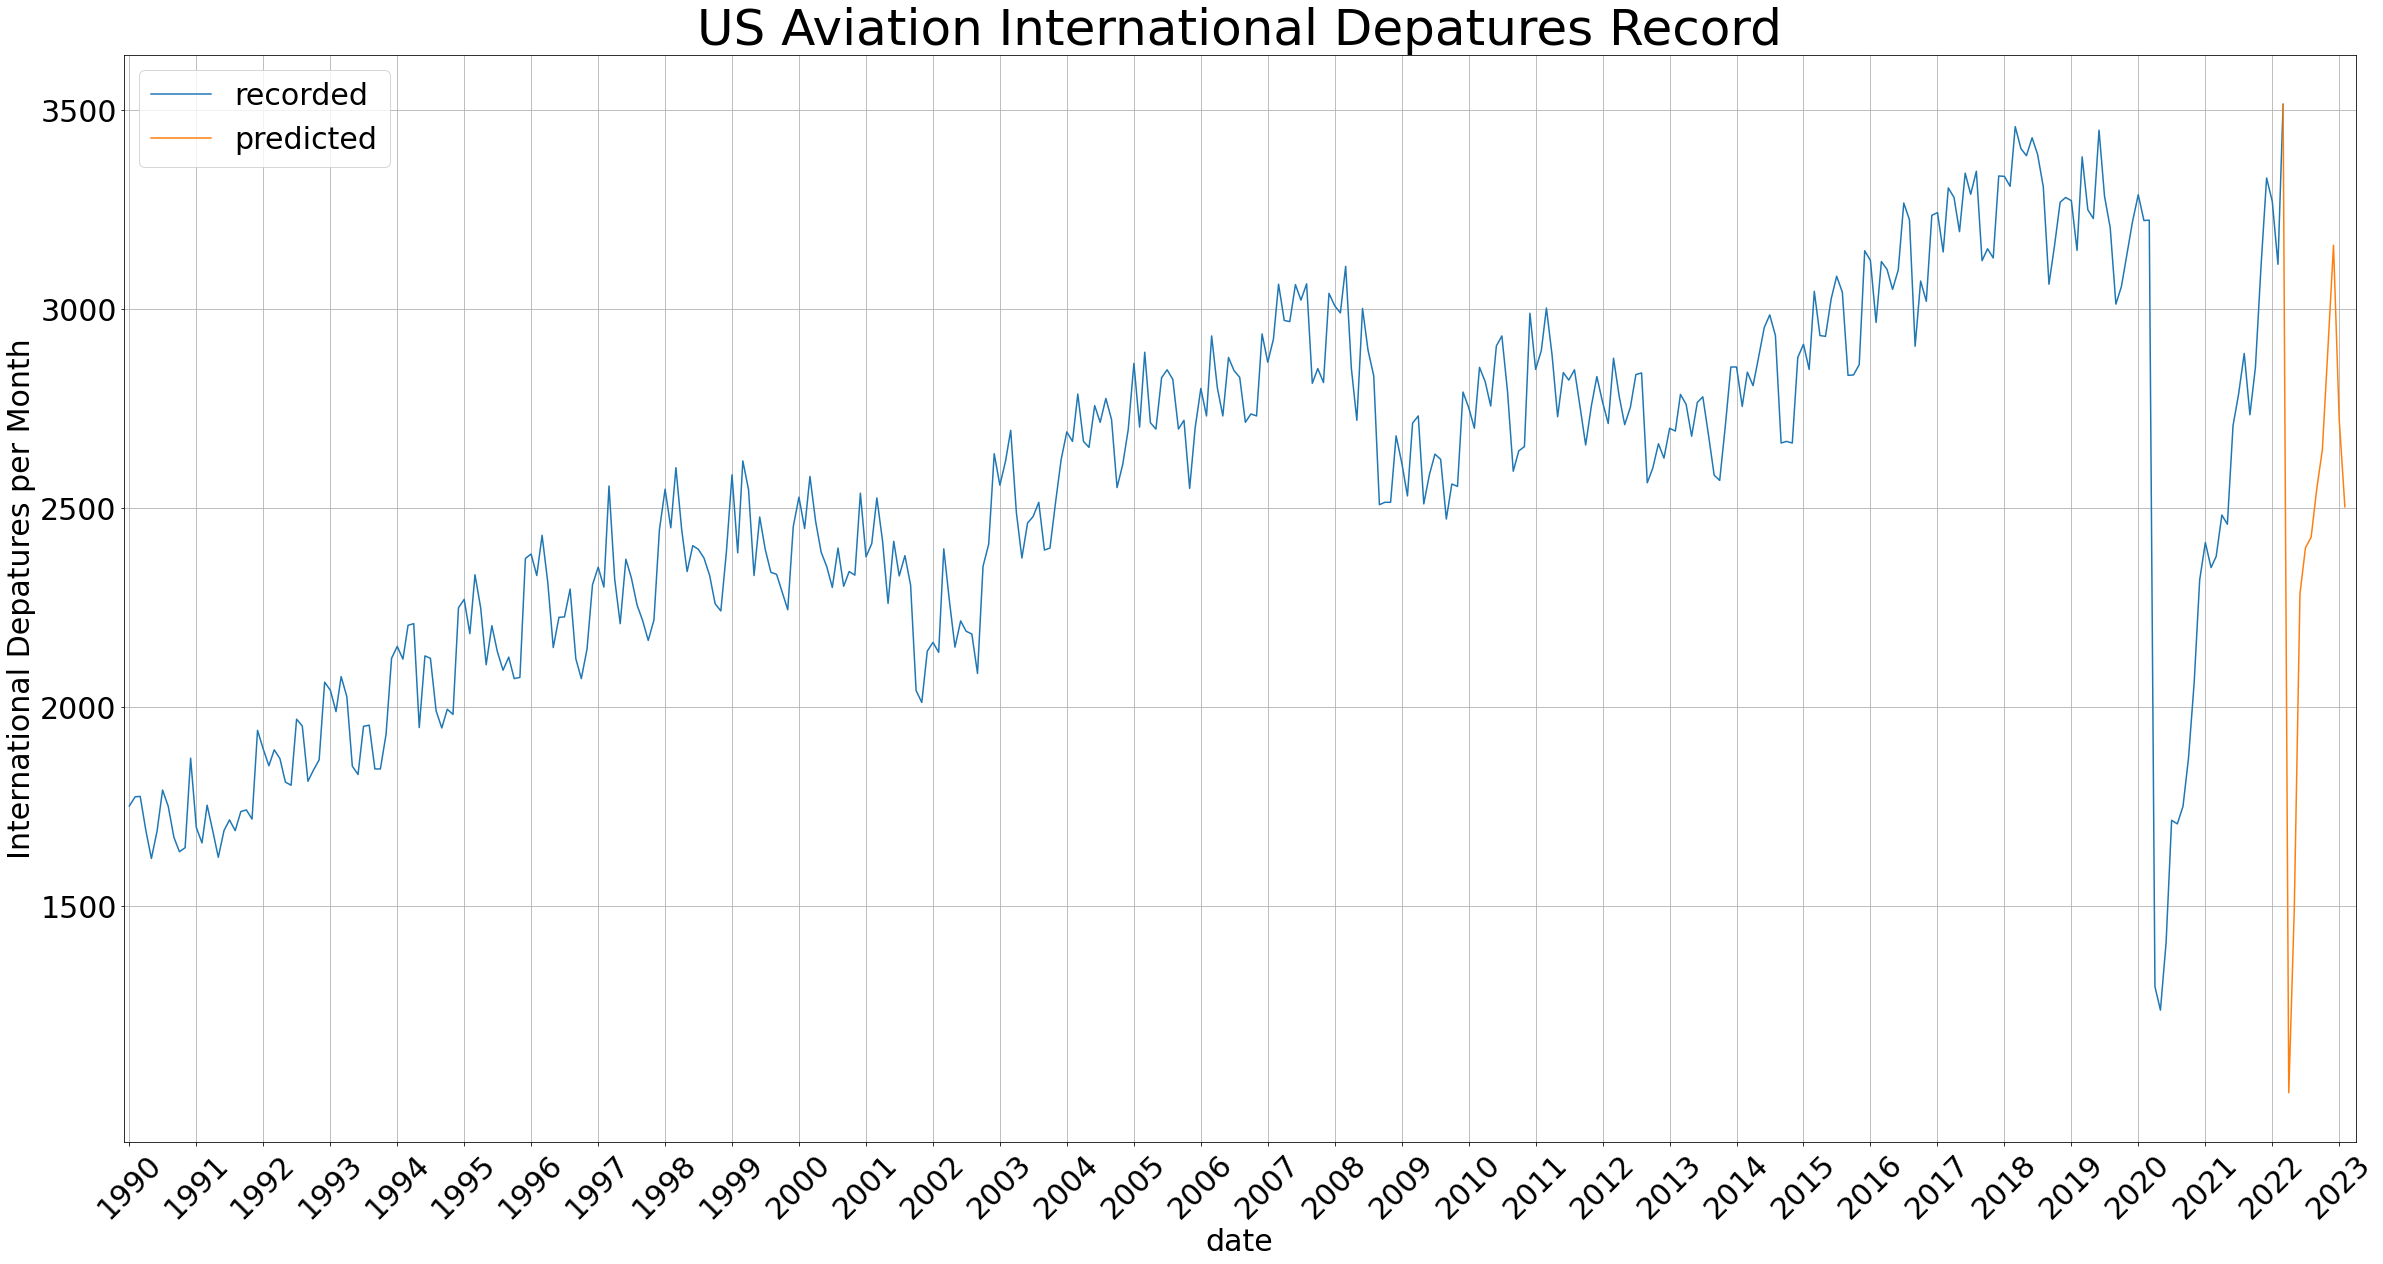

In [382]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((40,20))
sns.lineplot(time_index,y, label = 'recorded')
time_index_2 = pd.date_range(start = '2022-03-01', end = '2023-02-01', freq = 'MS')
sns.lineplot(time_index_2, lis, label = "predicted")
plt.xlim((pd.to_datetime('1989-12-01'), pd.to_datetime('2023-04-01')))
plt.xticks(size = 30, rotation = 45)
ax.xaxis.set_major_locator(mdates.YearLocator())
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.yticks([1500,2000,2500,3000,3500],size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('International Depatures per Month', size = 30)
plt.title("US Aviation International Depatures Record", size = 50)
plt.legend(fontsize = 30)
plt.grid()
plt.show()
